In [1]:
# Dummy Variable trap is not a problem when you use Gradient Descent
# We will specifically engineer a situation where we can not use a closed form solution and then show that Gradient Descent
# can do the job.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
N = 10 # Number of data points
D = 3 # Dimensionality is 3

# So, X will be an N by D matrix. Let's initialize that-
X = np.zeros((N, D))
X[:, 0] = 1 # setting the bias term as 1 for the 1st column
X[:5, 1] = 1 # first 5 elements of the second column to 1
X[5:, 2] = 1 # last 5 elements of the third column to 1

X

array([[ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.]])

In [7]:
Y = np.array([0]*5 + [1]*5)  
# i.e. the response variable Y is set to 0 (the first 5 elements of the data) and 1 (the last 5 elements of the data)
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [8]:
# Now let's try to do a regular solution of the linear regression

w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

LinAlgError: Singular matrix

In [9]:
# Now this is important, we get an error saying X.T.dot(X) is a singular matyrix and we can't  take an inverse of that.
# This is so because Y is a linear combination of X3 and hence it's a singular matrix and you can't do a inverse of that.
# Hence the solution doesn't work, it's not a closed form.
# So, let's try Gradient Descent to solve this problem

In [13]:
costs = []  # the value of the objective function which we are going to plot 
# Initializing the random weights
w = np.random.randn(D) / np.sqrt(D)  # this ensures that it generates as many random weights as the dimensionality
# and also makes sure that the variance is 1/D which we have learnt in the theory. This will be a list

learning_rate =  0.001

In [14]:
# Now we will do 1000 iterations also called as 1000 epochs and try to minimize the Cost function.
# Cost Function : (Y - Xw).T(Y - Xw)
# The Gradient (i.e. the 1st derivative or the slope) : 2X.T(Yhat - Y) , note we will ignore 2 as this gets absorbed in the learn rate.

for t in range(1000):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate*X.T.dot(delta)
    mse = delta.dot(delta) / N  # summation of (Yhat - Y)^2 over N (i.e. all data points)
    costs.append(mse)  # the value of the cost function at each epoch

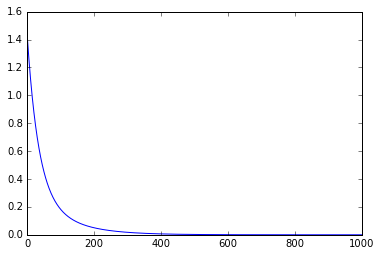

In [15]:
plt.plot(costs)

In [16]:
# i.e. the Cost drops at every iteration of Gradient Descent. i.e. the value of Error function (Yhat - Y)^2 drops ...

In [17]:
# And now print the final w (estimated weights)
print(w)

[ 0.82842293 -0.82446377  0.16761734]


In [18]:
# And this is the solution to this problem. :)

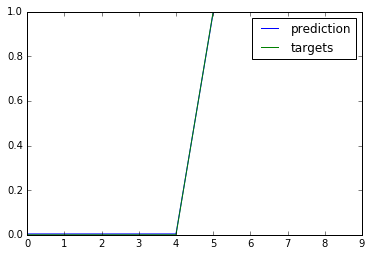

In [19]:
# Let's confirm this solution-
plt.plot(Yhat, label = 'prediction')
plt.plot(Y, label = 'targets')
plt.legend()

In [ ]:
# So, our predictions are vey close to the target